In [2]:
import numpy as np
from readlif.reader import LifFile
from matplotlib import pyplot as plt
import skimage
import pandas as pd
import napari
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle


import preprocessing
import segmentation
import feature_extraction


In [3]:
Segmenter = segmentation.Segmenter()

In [20]:
images = Segmenter.load_images('images/JC_Plate1_both_high/gamma_adjusted', 'dapi')

In [21]:
Segmenter.create_stardist_masks(images, 0.5, output_path='images/JC_Plate1_both_high/stardist_masks')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


Processing images:   0%|          | 0/4 [00:00<?, ?it/s]

Processing JC_Plate1_both_high_0_dapi_gamma_adjusted.tiff
Processing JC_Plate1_both_high_1_dapi_gamma_adjusted.tiff
Processing JC_Plate1_both_high_2_dapi_gamma_adjusted.tiff
Processing JC_Plate1_both_high_3_dapi_gamma_adjusted.tiff


[{'filename': 'JC_Plate1_both_high_0_dapi_gamma_adjusted.tiff',
  'image': array([[[0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ]],
  
         [[0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
        

In [22]:
images = Segmenter.load_images('images/JC_Plate1_both_high\stardist_masks', '')

In [23]:
Segmenter.clear_masks(images, output_path='images/JC_Plate1_both_high/stardist_masks_cleared')

()

In [4]:
images = Segmenter.load_images('images/JC_Plate1_both_high/stardist_masks_cleared', 'high_2')
img = images[0]['image']

In [25]:
import os

import matplotlib.image as mpimg

# Create the directory if it doesn't exist
output_dir = "mask_slices"
os.makedirs(output_dir, exist_ok=True)

# Specify the z-slices you want to save
z_slices = [6, 9, 12, 15]

for z in z_slices:
    # Create the file path
    file_path = os.path.join(output_dir, f'Stardist_{z}.png')
    
    # Save the image slice directly
    mpimg.imsave(file_path, img[z], cmap='viridis')


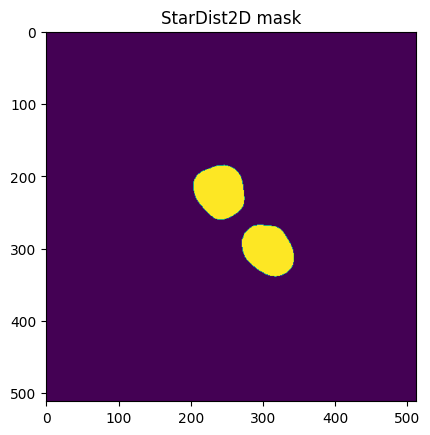

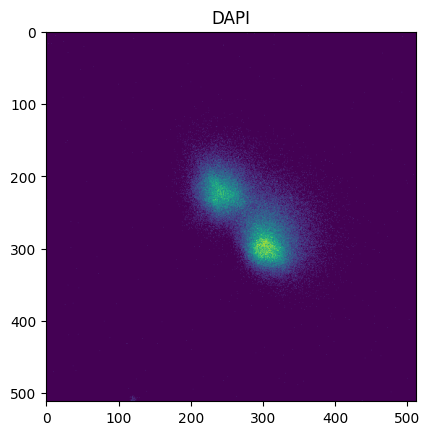

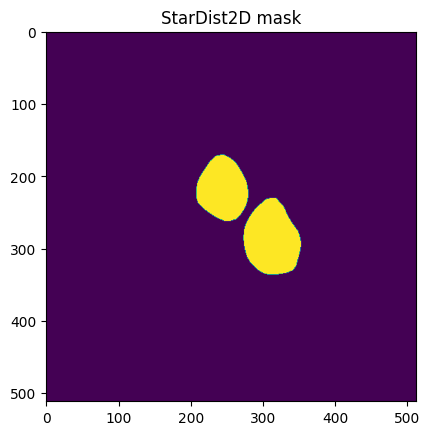

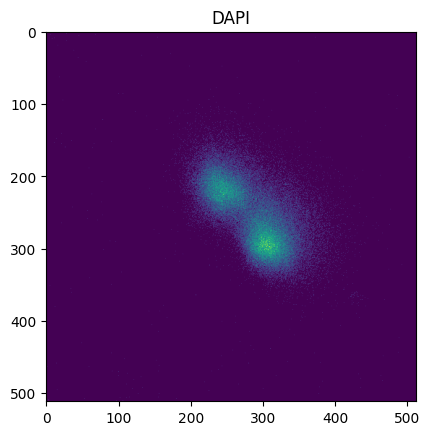

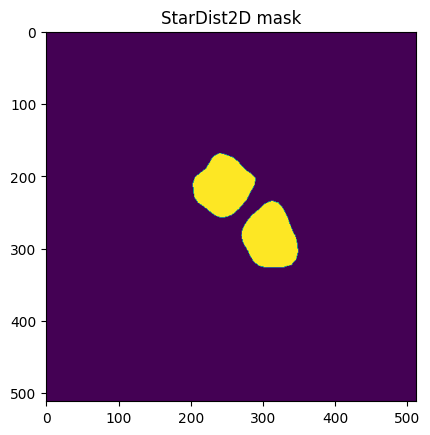

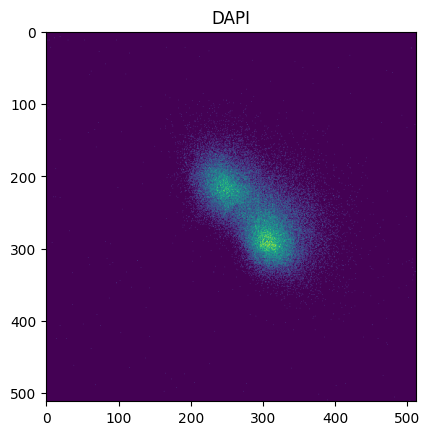

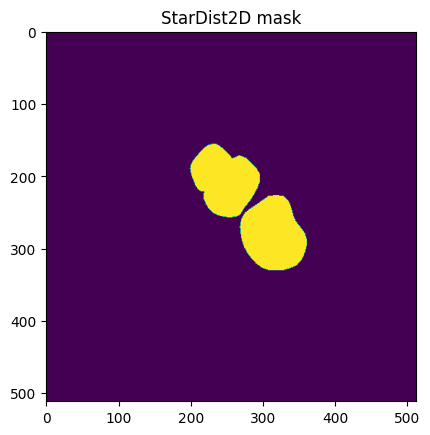

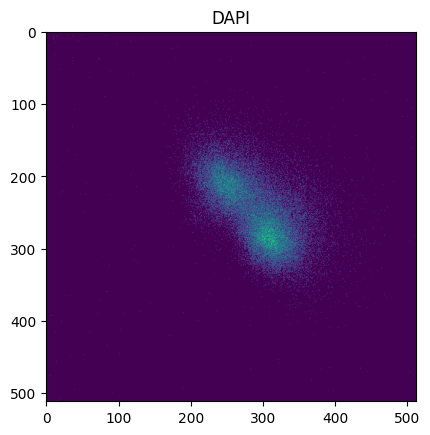

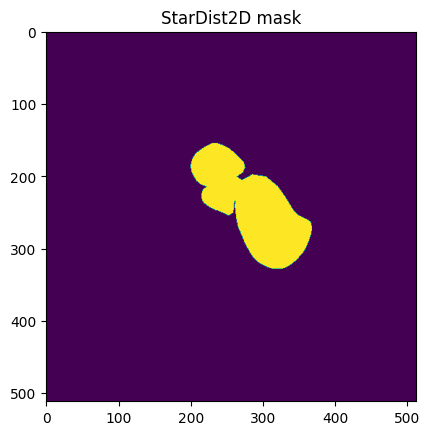

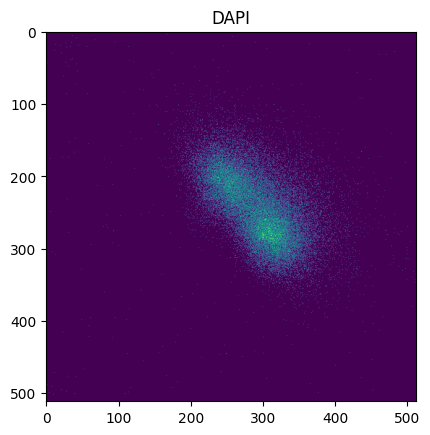

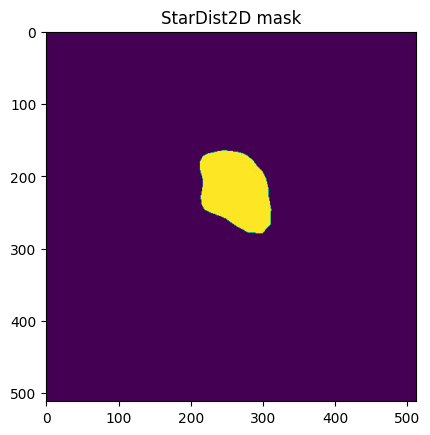

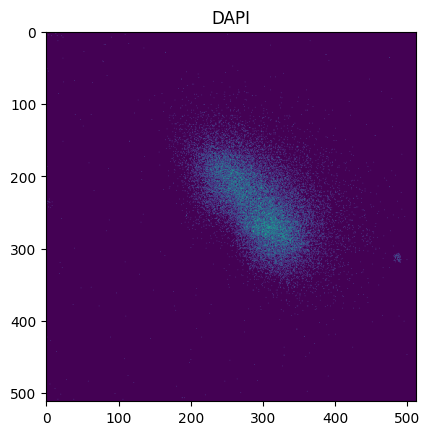

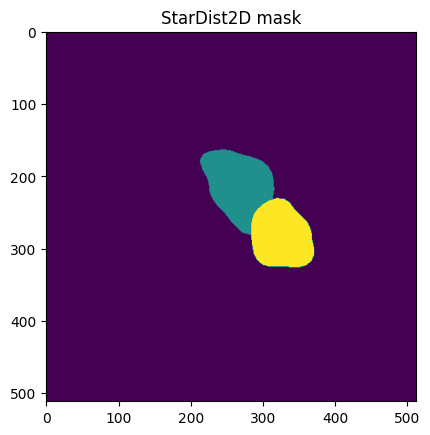

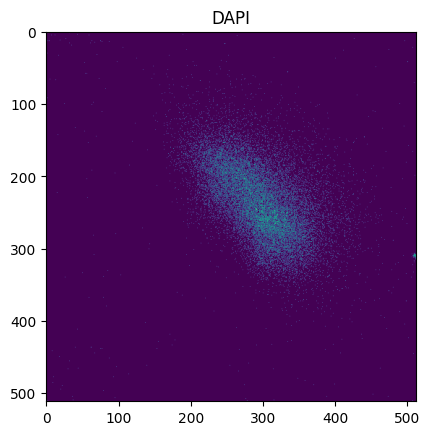

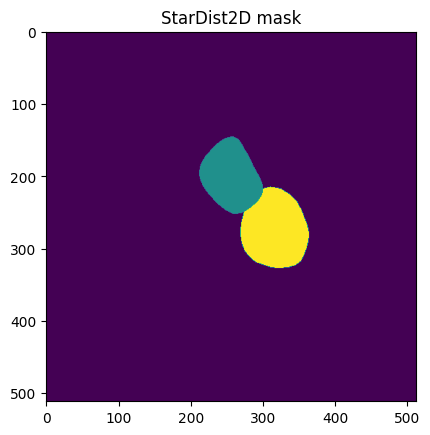

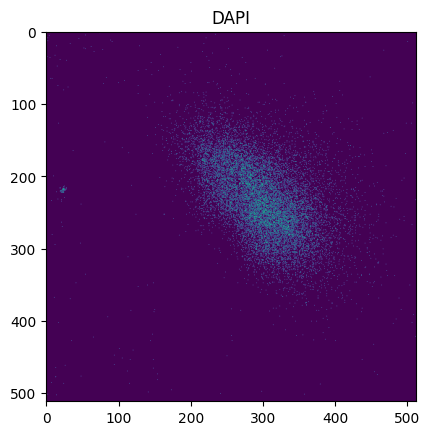

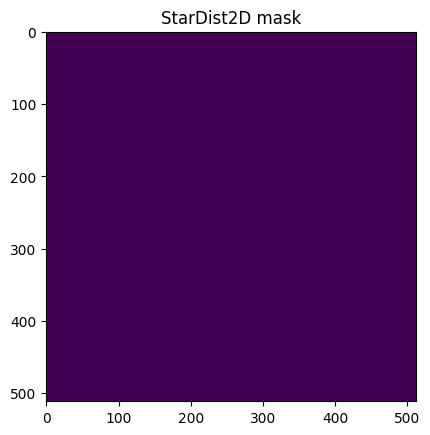

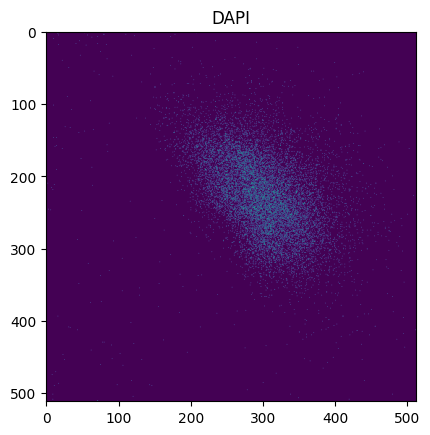

In [9]:
images = Segmenter.load_images('images/JC_Plate1_both_high/stardist_masks_cleared', 'high_2')
img = images[0]['image']

images_dapi = Segmenter.load_images('images/JC_Plate1_both_high/gamma_adjusted', 'high_2')
dapi = images_dapi[0]['image']

for z in range(20,img.shape[0]):
    plt.imshow(img[z], cmap='viridis')
    plt.title('StarDist2D mask')
    plt.show()
    plt.imshow(dapi[z], cmap='viridis')
    plt.title('DAPI')
    plt.show()